In [12]:
import pandas as pd
import numpy as np
import csv
from cProfile import label
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

with open('T_T100I_MARKET_US_CARRIER_ONLY.csv', 'r') as file:
    df1 = pd.read_csv(file)


In [13]:
data = df1[['PASSENGERS', 'UNIQUE_CARRIER_NAME',  
            'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY_NAME',
             'DEST', 'DEST_CITY_NAME', 'DEST_COUNTRY',
            'DEST_COUNTRY_NAME',  'YEAR', 'QUARTER', 'MONTH',
            'DISTANCE_GROUP', 'CLASS']]
# data['YEAR'] = pd.to_datetime(data['YEAR'])
# data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))



In [14]:
def query_org(airport_code):
    city_data = data[data.ORIGIN == airport_code].sort_values(
        ['PASSENGERS'], ascending=False)
    return city_data

def pivot_org(data, category):
    data_pivot = pd.pivot_table(data, columns=['MONTH'], index=[
        category], values=['PASSENGERS'], aggfunc='sum', margins=True, margins_name='Total')
    rank = data_pivot['PASSENGERS'].sort_values(
        by='Total', ascending=False).drop('Total')
    return rank


def plot(data, airport_code, category):
    A = data.drop('Total', axis=1)
    A = A.T
    plt.ylabel('Passengers')
    plt.xlabel('Month')
    plt.xticks([i for i in range(1, 13)])
    for i in A.columns:
        plt.plot(A.index, A[i], label=A[i].name)

    plt.legend(fontsize=18, loc=(1.04, 0))
    plt.rcParams["figure.figsize"] = (10, 7)
    plt.title(f'{airport_code} top 10 by {category}')

# airport_code = 'SFO'
# city = query_org(airport_code)
# category = 'DEST_COUNTRY_NAME'
# res = pivot_org(city, category)
# top = res.head(10)
# plot(top,airport_code, category)

In [15]:
data = data.query(
    """`ORIGIN_COUNTRY_NAME` =='United States'  """).sort_values(['PASSENGERS'], ascending=False)
    
data_pivot = pd.pivot_table(data, columns=['MONTH'], index=[
    'DEST_COUNTRY_NAME'], values=['PASSENGERS'], aggfunc='sum', margins=True, margins_name='Total')
# data_pivot = data_pivot.reindex(data_pivot['PASSENGERS'].sort_values(
#     by='Total', ascending=False).index).drop('Total')

top = data_pivot['PASSENGERS'].sort_values(
       by='Total', ascending=False).drop('Total')
top_10 = top.head(10)
top_50 = top.head(50)


In [16]:
# origin country is US and sort values by total passenger number

def top_figure(text):
    data_pivot = pd.pivot_table(data, columns=['MONTH'], index=[
        text], values=['PASSENGERS'], aggfunc='sum', margins=True, margins_name='Total')
    # data_pivot = data_pivot.reindex(data_pivot['PASSENGERS'].sort_values(
    #     by='Total', ascending=False).index).drop('Total')

    top = data_pivot['PASSENGERS'].sort_values(
        by='Total', ascending=False).drop('Total')
    top_10 = top.head(10)
    top_50 = top.head(50)
    return top_50


# text = 'DEST_CITY_NAME'
# top_figure(text)


Text(0.5, 1.0, 'US top 10 DEST Country 2021')

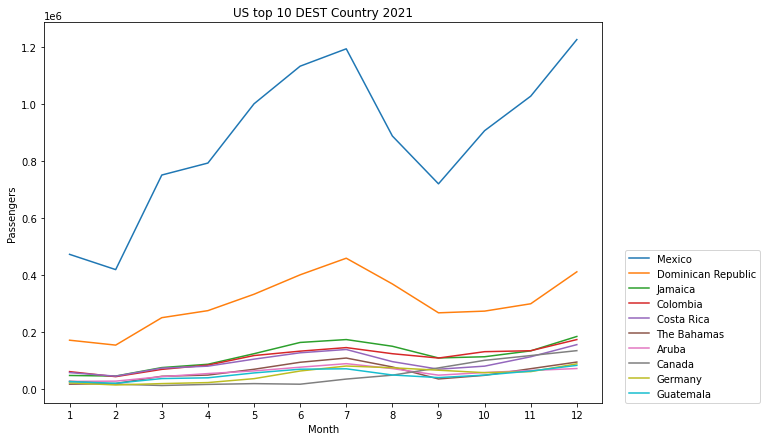

In [17]:


A = top_10.drop('Total', axis = 1)
A = A.T
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.xticks([i for i in range(1,13)])
for i in A.columns:
    plt.plot(A.index,A[i], label=A[i].name)

plt.legend(fontsize=10, loc=(1.04, 0))
plt.rcParams["figure.figsize"] = (10, 7)
plt.title(f'US top 10 DEST Country 2021')


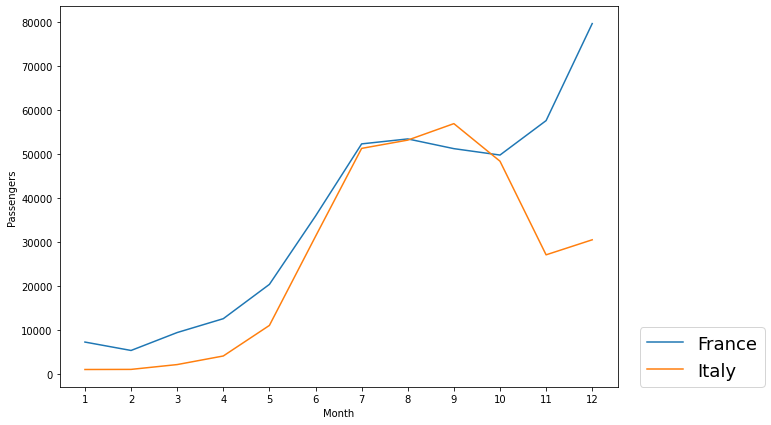

In [18]:
A = top_50.drop('Total', axis=1)
A = A.T
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.xticks([i for i in range(1, 13)])
plt.plot(A.index, A.France, label = 'France')
plt.plot(A.index, A.Italy, label='Italy')
plt.legend(fontsize=18, loc=(1.04, 0))
plt.rcParams["figure.figsize"] = (10, 7)


In [19]:
paris_data = data.query(
    """`ORIGIN_COUNTRY_NAME` =='United States' and `DEST_COUNTRY_NAME` == 'France' and `PASSENGERS` > 100 """).sort_values(['PASSENGERS'], ascending=False)
paris_data.head(10)

paris_pivot = pd.pivot_table(paris_data, columns=['MONTH'], index=[
    'UNIQUE_CARRIER_NAME'], values=['PASSENGERS'], aggfunc='sum', margins=True, margins_name='Total')
top_paris = paris_pivot['PASSENGERS'].sort_values(
    by='Total', ascending=False).drop('Total')
top_paris_10 = top_paris.head(10)
top_paris_10


MONTH,1,2,3,4,5,6,7,8,9,10,11,12,Total
UNIQUE_CARRIER_NAME,,,,,,,,,,,,,
Delta Air Lines Inc.,5956.0,4495.0,7909.0,10404.0,16392.0,22643.0,31619.0,32974.0,31144.0,29919.0,33872.0,41881.0,269208.0
United Air Lines Inc.,1223.0,532.0,1016.0,1090.0,2432.0,7910.0,12687.0,13603.0,12849.0,11403.0,14891.0,21632.0,101268.0
American Airlines Inc.,NaN,241.0,381.0,999.0,1467.0,5248.0,7865.0,6704.0,7105.0,8324.0,8687.0,15987.0,63008.0


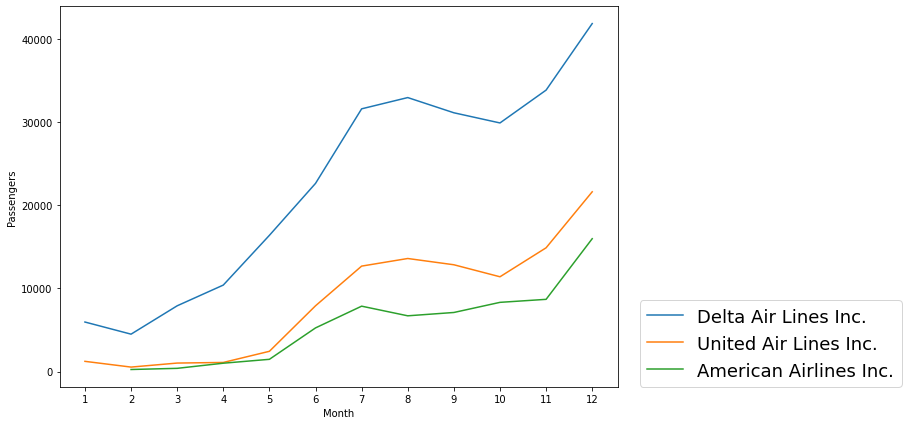

In [20]:
Paris = top_paris_10.drop('Total', axis=1)
Paris = Paris.T
plt.ylabel('Passengers')
plt.xlabel('Month')
plt.xticks([i for i in range(1, 13)])
for i in Paris.columns:
    plt.plot(Paris.index, Paris[i], label=Paris[i].name)

plt.legend(fontsize=18, loc=(1.04, 0))
plt.rcParams["figure.figsize"] = (10, 7)
